In [ ]:
#Medición del tiempo de inicio
import time

# Registrar el tiempo actual en el momento del inicio
inicio = time.time()

# Carga de Paquetes y Librerias

In [ ]:
# Basic packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import seaborn as sns
from pandas.plotting import scatter_matrix
from tabulate import tabulate
from numpy import array
import datetime as dt           # Permite trabajar con fechas

# Machine learning packages
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline


# Reducción de dimensiones
from sklearn.decomposition import PCA

# Regresión lineal
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

# Métricas de rendimiento
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score, mean_absolute_percentage_error
import scipy.stats as stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from scipy.stats import bartlett

# TensorFlow ≥2.0-preview is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Pretty print
from pprint import pprint

# SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Google
from google.colab import files  # Permite descargar archivos directamente desde Colab

# Ignorar advertencias
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', '.*do not.*', )

# Mostrar advertencia personalizada
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

In [ ]:
def TrainingSets(data, dataξ, step_back):
    """
    Genera conjuntos de entrenamiento para un modelo de predicción basado en series de tiempo.

    Parámetros:
    - data (array-like): Datos de la serie de tiempo principal.
    - dataξ (array-like): Datos de la serie de tiempo exógena.
    - step_back (int): Número de pasos hacia atrás en el tiempo para cada muestra de entrenamiento.

    Retorna:
    - X_train (array): Conjunto de características de entrenamiento.
    - ξ_train (array): Conjunto de valores objetivo de entrenamiento correspondientes.

    Descripción:
    Esta función toma dos series de tiempo y un parámetro step_back para generar conjuntos de entrenamiento.
    Cada muestra de entrenamiento en X_train consiste en una secuencia de step_back puntos en la serie de tiempo
    principal, mientras que el valor correspondiente en la serie de tiempo exógena se almacena en ξ_train.
    """

    train_data = data.copy()
    train_dataξ = dataξ.copy()

    # Conjuntos de entrenamiento
    X_train, ξ_train = [], []

    for i in range(len(train_data) - step_back - 1):
        a = train_data[i:(i + step_back)]
        X_train.append(a)
        ξ_train.append(train_dataξ[i + step_back])

    X_train = np.array(X_train)
    ξ_train = np.array(ξ_train)

    return X_train, ξ_train

# Carga de Base de Datos

In [ ]:
# Cargar datos de demanda energética comercial en Colombia desde Google Drive (acceso libre)

# Código de identificación del archivo en Google Drive
FILEID = "1feevcPPLWwZS2_ixxgKUoVi25NJQ0uJ_"  # Copiar el código desde el enlace generado en Google Drive

# Descargar el archivo utilizando wget y gestionar las cookies temporales
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O Departamentos.zip && rm -rf /tmp/cookies.txt

# Descomprimir el archivo descargado en el directorio principal de Colab
!unzip Departamentos.zip

# Mostrar el contenido del directorio actual
!dir

--2023-07-28 16:34:24--  https://docs.google.com/uc?export=download&confirm=&id=1feevcPPLWwZS2_ixxgKUoVi25NJQ0uJ_
Resolving docs.google.com (docs.google.com)... 173.194.213.139, 173.194.213.100, 173.194.213.138, ...
Connecting to docs.google.com (docs.google.com)|173.194.213.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0c-6k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/4m60nr6rlodggarj306ua03fdfa9i1r5/1690562025000/15940467605774616319/*/1feevcPPLWwZS2_ixxgKUoVi25NJQ0uJ_?e=download&uuid=28a25970-cf39-4da4-b84d-687e8c68ca98 [following]
--2023-07-28 16:34:24--  https://doc-0c-6k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/4m60nr6rlodggarj306ua03fdfa9i1r5/1690562025000/15940467605774616319/*/1feevcPPLWwZS2_ixxgKUoVi25NJQ0uJ_?e=download&uuid=28a25970-cf39-4da4-b84d-687e8c68ca98
Resolving doc-0c-6k-docs.googleusercontent.com (doc-0c-6k-docs.googleusercontent.com)... 142.250.97.13

In [ ]:
# Mostrar listado de elementos
!ls

Demanda_Arreglo_LSTM_Rd_CL.xlsx   Demanda_Arreglo_Mean.xlsx
Demanda_Arreglo_LSTM_Rd_Sin.xlsx  Departamentos.zip
Demanda_Arreglo_LSTM_Rd.xlsx      sample_data/


In [ ]:
# Ruta del archivo de Excel que contiene los datos
archivo_excel = '/content/Demanda_Arreglo_Mean.xlsx'

# Relleno de datos faltantes con el valor medio de cada columna
df.fillna(df.mean(), inplace=True)

# Leer los datos desde el archivo Excel y cargarlos en un DataFrame
df = pd.read_excel(archivo_excel)

# Eliminar la columna 'Date' del DataFrame
df = df.drop('Date', axis=1)

# Generar un rango de fechas con frecuencia horaria y establecer un nuevo índice
date_rng = pd.date_range(start='2020-10-01', end='2023-01-01', freq='H')

# Establecer el índice del DataFrame a las fechas generadas, excluyendo la última fecha
df.set_index(date_rng[0:-1], inplace=True)

<Axes: title={'center': 'Demanda Energia Horaria en Colombia kWh'}, xlabel='Fecha', ylabel='kWh'>

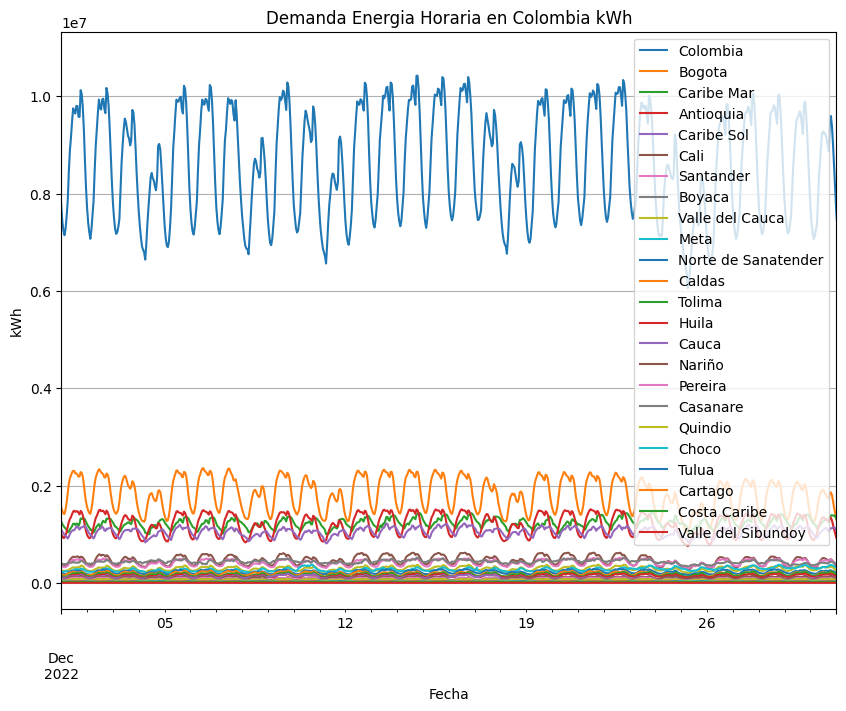

In [ ]:
# Crear un gráfico de líneas a partir de un DataFrame.

df.plot(
    kind='line',                     # Tipo de gráfico: línea
    figsize=(10, 7.5),               # Tamaño de la figura (ancho x alto)
    title='Demanda Energía Horaria en Colombia kWh',  # Título del gráfico
    grid=True,                       # Mostrar cuadrícula
    ylabel='kWh',                    # Etiqueta del eje Y
    xlabel='Fecha',                  # Etiqueta del eje X
    xlim=('2022-12-01', '2022-12-31') # Límites del eje X (rango de fechas)
)

# Normalizacion


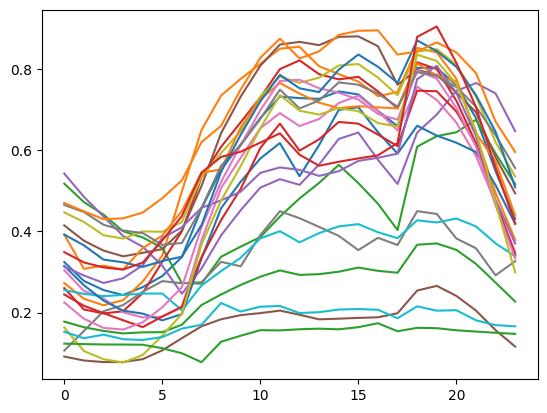

In [ ]:
# Preprocesamiento y visualización de datos utilizando un escalador y gráficos.

# Crear una copia del DataFrame 'df' para trabajar con los datos.
df1 = df.copy()

# Crear un objeto escalador MinMaxScaler para normalizar los datos.
scaler = MinMaxScaler()

# Ajustar el escalador a los datos del DataFrame 'df1'.
scaler.fit(df1)

# Aplicar el escalado a los datos del DataFrame 'df1'.
df1 = scaler.transform(df1)

# Graficar los datos transformados del DataFrame 'df1'.
# Solo se grafican las primeras 24 filas (correspondientes a 24 horas) de los datos normalizados.
plt.plot(df1[0:24, :])
plt.show()

In [ ]:
# Preprocesamiento de datos y análisis de dimensiones de las series temporales.

# Crear una copia de los datos de la serie temporal del DataFrame 'df1'.
Ts1 = df1[:, 1:].copy()

# Crear una variable 'out' para almacenar la serie de valores de salida.
out = df1[:, 0]

# Imprimir el tamaño de la serie temporal y la serie de salida.
print('Tamaño Serie Horaria:', Ts1.shape)
print('Tamaño Serie Salida:', out.shape)

Tamaño Serie Horaria:  (19728, 24)
Tamaño Serie Salida:  (19728,)


# Modelos DL


# TimeStep = 30

### Conjunto de Entrenamiento


In [ ]:
# Particionamiento de datos y particionamiento de conjuntos de entrenamiento y prueba.

# Definición del tamaño de retroceso (time_step o step_back) para la partición de los datos.
step_back = 30

# Generación de conjuntos de entrenamiento y objetivo utilizando la función TrainingSets.
# La función TrainingSets se utiliza para generar conjuntos de entrenamiento basados en series de tiempo.
X1, Y1 = TrainingSets(data=Ts1, dataξ=out, step_back=step_back)

# Particionamiento de conjuntos de entrenamiento y prueba utilizando un factor de partición 'Part'.
Part = 0.8

# Particionamiento de la serie 1 en conjuntos de prueba y entrenamiento.
X_test1 = X1[int(len(X1) * 0.8):]
X_train1 = X1[:int(len(X1) * 0.8)]

# Particionamiento de la serie 1 en conjuntos de prueba y entrenamiento.
Y_test1 = Y1[int(len(Y1) * 0.8):]
Y_train1 = Y1[:int(len(Y1) * 0.8)]

In [ ]:
# Configuración de hiperparámetros para el entrenamiento de un modelo.

# Número de épocas (epochs) de entrenamiento.
N = 100

# Tamaño del lote (batch size) utilizado durante el entrenamiento.
bsz = 512

# Configuración de callbacks e impresión del tamaño de características.

# Configuración de callbacks para el entrenamiento del modelo.
callbacks = [
    keras.callbacks.ModelCheckpoint("best_model.h5", save_best_only=True, monitor="val_loss"),  # Guardar el mejor modelo
    keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=5, min_lr=0.0001),  # Reducir la tasa de aprendizaje
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=7, verbose=1),  # Detener el entrenamiento temprano si no hay mejora
]

# Impresión del tamaño de características en el conjunto de entrenamiento 1.
feature_size = X_train1.shape[1]

### LSTM

In [ ]:
# Definición, entrenamiento y resumen de un modelo LSTM.

# Definición de un modelo secuencial utilizando capas LSTM.
model_LSTM = keras.models.Sequential([
    keras.layers.LSTM(100, return_sequences=True, input_shape=[step_back, Ts1.shape[1]]),  # Capa LSTM con 100 unidades
    keras.layers.LSTM(100, return_sequences=True),  # Otra capa LSTM con 100 unidades
    keras.layers.LSTM(100, return_sequences=True),  # Otra capa LSTM con 100 unidades
    keras.layers.LSTM(1)  # Capa LSTM de salida con 1 unidad
])
model_LSTM.summary()

# Entrenamiento del modelo.

# Compilación del modelo con función de pérdida y optimizador.
model_LSTM.compile(loss="mse", optimizer="adam", metrics=['mae', 'mse'])

# Entrenamiento del modelo utilizando los conjuntos de entrenamiento y callbacks definidos previamente.
history = model_LSTM.fit(X_train1, Y_train1, epochs=N, batch_size=bsz, callbacks=callbacks, validation_split=0.2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 100)           50000     
                                                                 
 lstm_1 (LSTM)               (None, 30, 100)           80400     
                                                                 
 lstm_2 (LSTM)               (None, 30, 100)           80400     
                                                                 
 lstm_3 (LSTM)               (None, 1)                 408       
                                                                 
Total params: 211,208
Trainable params: 211,208
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
25/25 [==============================] - 14s 98ms/step - loss: 0.0518 - mae: 0.1917 - mse: 0.0518 - val_loss: 0.0404 - val_mae: 0.1766 - val_mse: 0.0404 - lr: 0.0010
Epoc

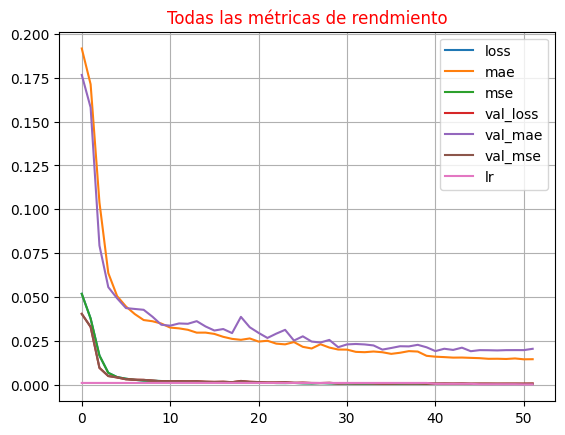

In [ ]:
# Visualización de métricas de rendimiento durante el entrenamiento.

# Crear un DataFrame a partir del historial de entrenamiento (history).
hpd = pd.DataFrame(history.history)

# Crear un gráfico de líneas para visualizar las métricas de rendimiento.
hpd.plot()

# Configuración del título y estilo del gráfico.
plt.title('Todas las métricas de rendimiento', color='red')
plt.grid(True)  # Mostrar cuadrícula en el fondo del gráfico

# Mostrar el gráfico.
plt.show()

### ANN

In [ ]:
# Definición, resumen y entrenamiento de un modelo de red neuronal densa (ANN).

# Definición de un modelo secuencial utilizando capas densas (Dense).
model_ANN = keras.models.Sequential([
    keras.layers.Dense(100, input_shape=[step_back, Ts1.shape[1]]),  # Capa densa con 100 unidades
    keras.layers.Dense(100),  # Otra capa densa con 100 unidades
    keras.layers.Dense(100),  # Otra capa densa con 100 unidades
    keras.layers.Dense(1)  # Capa densa de salida con 1 unidad
])
model_ANN.summary()

# Entrenamiento del modelo.

# Compilación del modelo con función de pérdida y optimizador.
model_ANN.compile(loss="mse", optimizer="adam", metrics=['mae', 'mse'])

# Entrenamiento del modelo utilizando los conjuntos de entrenamiento y validación definidos.
history = model_ANN.fit(X_train1, Y_train1, epochs=N, batch_size=bsz, validation_split=0.2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30, 100)           2500      
                                                                 
 dense_1 (Dense)             (None, 30, 100)           10100     
                                                                 
 dense_2 (Dense)             (None, 30, 100)           10100     
                                                                 
 dense_3 (Dense)             (None, 30, 1)             101       
                                                                 
Total params: 22,801
Trainable params: 22,801
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
25/25 [==============================] - 2s 19ms/step - loss: 0.1309 - mae: 0.2860 - mse: 0.1309 - val_loss: 0.0416 - val_mae: 0.1777 - val_mse: 0.0416 - lr: 0.0010
Epoch

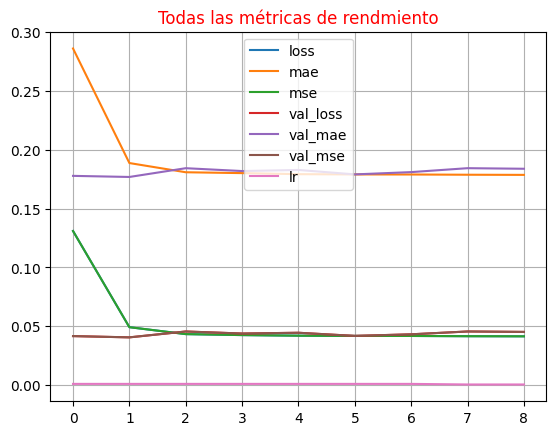

In [ ]:
# Visualización de métricas de rendimiento durante el entrenamiento.

# Crear un DataFrame a partir del historial de entrenamiento (history).
hpd = pd.DataFrame(history.history)

# Crear un gráfico de líneas para visualizar las métricas de rendimiento.
hpd.plot()

# Configuración del título y estilo del gráfico.
plt.title('Todas las métricas de rendimiento', color='red')
plt.grid(True)  # Mostrar cuadrícula en el fondo del gráfico

# Mostrar el gráfico.
plt.show()

### GRU

In [ ]:
# Definición, resumen y entrenamiento de un modelo GRU.

# Definición de un modelo secuencial utilizando capas GRU.
model_GRU = keras.models.Sequential([
    keras.layers.GRU(100, return_sequences=True, input_shape=[step_back, Ts1.shape[1]]),  # Capa GRU con 100 unidades
    keras.layers.GRU(100, return_sequences=True),  # Otra capa GRU con 100 unidades
    keras.layers.GRU(100, return_sequences=True),  # Otra capa GRU con 100 unidades
    keras.layers.GRU(1)  # Capa GRU de salida con 1 unidad
])
model_GRU.summary()

# Entrenamiento del modelo.

# Métricas de rendimiento a registrar durante el entrenamiento.
metrics = ['mae', 'mse']

# Compilación del modelo con función de pérdida y optimizador, y métricas de rendimiento.
model_GRU.compile(loss="mse", optimizer="adam", metrics=metrics)

# Entrenamiento del modelo utilizando los conjuntos de entrenamiento, callbacks y métricas definidos previamente.
history = model_GRU.fit(X_train1, Y_train1, epochs=N, batch_size=bsz, callbacks=callbacks, validation_split=0.2)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 30, 100)           37800     
                                                                 
 gru_1 (GRU)                 (None, 30, 100)           60600     
                                                                 
 gru_2 (GRU)                 (None, 30, 100)           60600     
                                                                 
 gru_3 (GRU)                 (None, 1)                 309       
                                                                 
Total params: 159,309
Trainable params: 159,309
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
25/25 [==============================] - 7s 64ms/step - loss: 0.0459 - mae: 0.1701 - mse: 0.0459 - val_loss: 0.0235 - val_mae: 0.1310 - val_mse: 0.0235 - lr: 0.0010
Epo

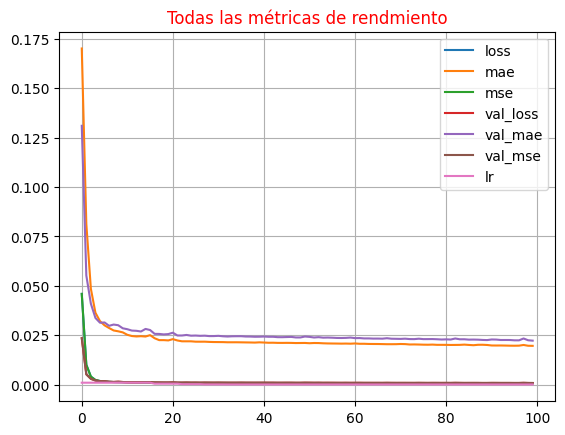

In [ ]:
# Visualización de métricas de rendimiento durante el entrenamiento.

# Crear un DataFrame a partir del historial de entrenamiento (history).
hpd = pd.DataFrame(history.history)

# Crear un gráfico de líneas para visualizar las métricas de rendimiento.
hpd.plot()

# Configuración del título y estilo del gráfico.
plt.title('Todas las métricas de rendimiento', color='red')
plt.grid(True)  # Mostrar cuadrícula en el fondo del gráfico

# Mostrar el gráfico.
plt.show()

### RNN

In [ ]:
# Definición, resumen y entrenamiento de un modelo de red neuronal con capas SimpleRNN.

# Definición de un modelo secuencial utilizando capas SimpleRNN.
model_RNN = keras.models.Sequential([
    keras.layers.SimpleRNN(100, return_sequences=True, input_shape=[step_back, Ts1.shape[1]]),  # Capa SimpleRNN con 100 unidades
    keras.layers.SimpleRNN(100, return_sequences=True),  # Otra capa SimpleRNN con 100 unidades
    keras.layers.SimpleRNN(100, return_sequences=True),  # Otra capa SimpleRNN con 100 unidades
    keras.layers.SimpleRNN(1)  # Capa SimpleRNN de salida con 1 unidad
])
model_RNN.summary()

# Entrenamiento del modelo.

# Métricas de rendimiento a registrar durante el entrenamiento.
metrics = ['mae', 'mse']

# Compilación del modelo con función de pérdida y optimizador, y métricas de rendimiento.
model_RNN.compile(loss="mse", optimizer="adam", metrics=metrics)

# Entrenamiento del modelo utilizando los conjuntos de entrenamiento, callbacks y métricas definidos previamente.
history = model_RNN.fit(X_train1, Y_train1, epochs=N, batch_size=bsz, callbacks=callbacks, validation_split=0.2)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 30, 100)           12500     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 30, 100)           20100     
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 30, 100)           20100     
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 1)                 102       
                                                                 
Total params: 52,802
Trainable params: 52,802
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
25/25 [==============================] - 6s 115ms/step - loss: 0.0487 - mae: 0.1382 - mse: 0.0487 - val_loss: 0.0037 - val_mae: 0.0497 - val_mse: 0.0037 - lr: 0.0010
Epoc

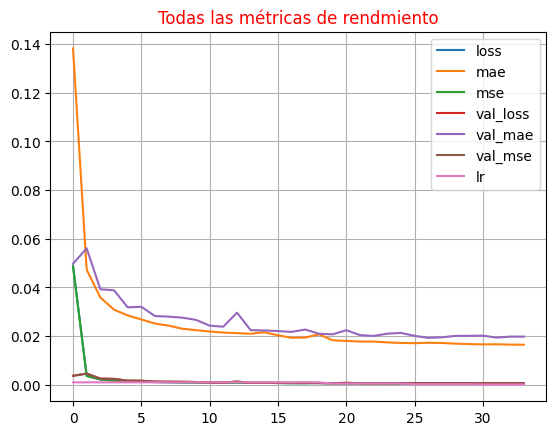

In [ ]:
# Visualización de métricas de rendimiento durante el entrenamiento.

# Crear un DataFrame a partir del historial de entrenamiento (history).
hpd = pd.DataFrame(history.history)

# Crear un gráfico de líneas para visualizar las métricas de rendimiento.
hpd.plot()

# Configuración del título y estilo del gráfico.
plt.title('Todas las métricas de rendimiento', color='red')
plt.grid(True)  # Mostrar cuadrícula en el fondo del gráfico

# Mostrar el gráfico.
plt.show()

# Rendimiento

124/124 [==============================] - 0s 2ms/step


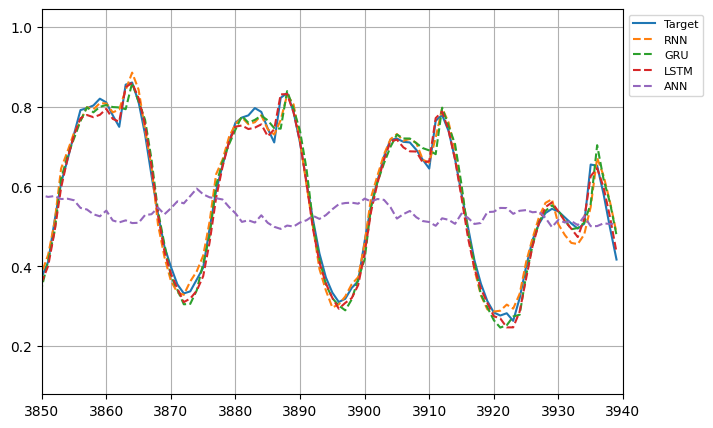

╒═════════════╤═════════════╤════════════╤════════════╤═══════════════╕
│ Metrics     │         RNN │        GRU │       LSTM │           ANN │
╞═════════════╪═════════════╪════════════╪════════════╪═══════════════╡
│ MSE         │ 0.02688     │ 0.03168    │ 0.02651    │  0.22933      │
├─────────────┼─────────────┼────────────┼────────────┼───────────────┤
│ RMSE        │ 0.000722658 │ 0.00100393 │ 0.00070304 │  0.052591     │
├─────────────┼─────────────┼────────────┼────────────┼───────────────┤
│ MAE         │ 0.0212      │ 0.02447    │ 0.02029    │  0.19862      │
├─────────────┼─────────────┼────────────┼────────────┼───────────────┤
│ R2          │ 0.98209     │ 0.97512    │ 0.98258    │ -0.30316      │
├─────────────┼─────────────┼────────────┼────────────┼───────────────┤
│ cnSMAPE     │ 0.96268     │ 0.95928    │ 0.96504    │  0.65975      │
├─────────────┼─────────────┼────────────┼────────────┼───────────────┤
│ P_Value_PS  │ 0           │ 0          │ 0          │  7.07495

In [ ]:
# Evaluación y visualización de los modelos de Aprendizaje Profundo.

# Predicciones utilizando los modelos entrenados.
forecasting_RNN = model_RNN.predict(X_test1)
forecasting_GRU = model_GRU.predict(X_test1)
forecasting_LSTM = model_LSTM.predict(X_test1)
forecasting_ANN = model_ANN.predict(X_test1)

# Lista de predicciones de todos los modelos.
forecasting_DL = [forecasting_RNN, forecasting_GRU, forecasting_LSTM, forecasting_ANN.reshape(forecasting_ANN.shape[0], 1)]

# Nombres de los modelos.
model_names_DL = ['RNN', 'GRU', 'LSTM', 'ANN']

# Crear una figura para la visualización.
plt.figure(figsize=(7.5, 5))

# Graficar el valor objetivo (target).
plt.plot(Y_test1, label='Target')

# Graficar las predicciones de cada modelo.
for i in range(len(forecasting_DL)):
    plt.plot(forecasting_DL[i], label=model_names_DL[i], linestyle='--')

# Configurar límites del eje x y mostrar leyenda.
plt.xlim(3850, len(forecasting_DL[i]))  # Ajustar límites para mejor visualización
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize='8')

# Mostrar cuadrícula y la figura.
plt.grid()
plt.show()

# Calculo y presentación de métricas de rendimiento.
col_names = ['Metrics', 'RNN', 'GRU', 'LSTM', 'ANN']
MSE, RMSE, MAE, R2, cnSMAPE, P_Value_PS, P_Value_TT, P_Value_Var = ['MSE'], ['RMSE'], ['MAE'], ['R2'], ['cnSMAPE'], ['P_Value_PS'], ['P_Value_TT'], ['P_Value_Var']

# Calcular métricas para cada modelo y almacenar en las listas correspondientes.
for k in range(4):
    MSE.append(round(mean_squared_error(Y_test1, forecasting_DL[k], squared=False), 5))
    RMSE.append(mean_squared_error(Y_test1, forecasting_DL[k], squared=True))
    MAE.append(round(mean_absolute_error(Y_test1, forecasting_DL[k]), 5))
    R2.append(round(r2_score(Y_test1, forecasting_DL[k]), 5))
    mape = mean_absolute_percentage_error(Y_test1, forecasting_DL[k])
    smape = 2 * mape * 100 / (100 - mape)
    cnSMAPE.append(round(1 - (smape / 2), 5))
    correlation, p_value = stats.pearsonr(Y_test1.reshape(len(Y_test1)), forecasting_DL[k].reshape(len(Y_test1)))
    P_Value_PS.append(p_value)
    correlation, p_value = stats.ttest_ind(Y_test1.reshape(len(Y_test1)), forecasting_DL[k].reshape(len(Y_test1)))
    P_Value_TT.append(p_value)
    statistic, p_value3 = bartlett(Y_test1.reshape(len(Y_test1)), forecasting_DL[k].reshape(len(Y_test1)))
    P_Value_Var.append(p_value3)

# Lista de listas de métricas para tabulate.
tablas = [MSE, RMSE, MAE, R2, cnSMAPE, P_Value_PS, P_Value_TT, P_Value_Var]

# Imprimir tablas con métricas.
print(tabulate(tablas, headers=col_names, tablefmt="fancy_grid"))

124/124 [==============================] - 0s 4ms/step


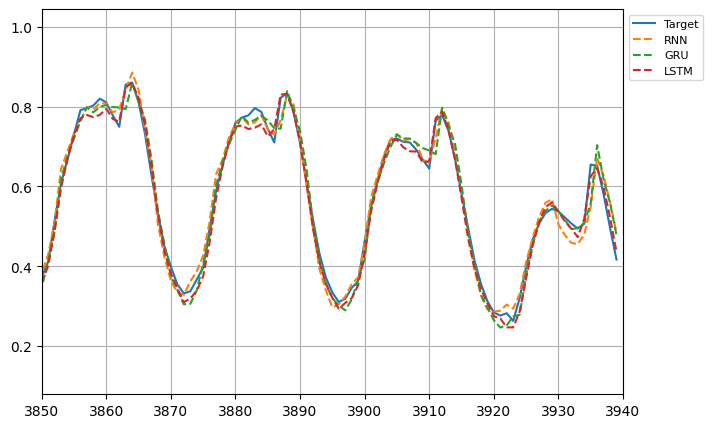

╒═════════════╤═════════════╤════════════╤════════════╕
│ Metrics     │         RNN │        GRU │       LSTM │
╞═════════════╪═════════════╪════════════╪════════════╡
│ MSE         │ 0.02688     │ 0.03168    │ 0.02651    │
├─────────────┼─────────────┼────────────┼────────────┤
│ RMSE        │ 0.000722658 │ 0.00100393 │ 0.00070304 │
├─────────────┼─────────────┼────────────┼────────────┤
│ MAE         │ 0.0212      │ 0.02447    │ 0.02029    │
├─────────────┼─────────────┼────────────┼────────────┤
│ R2          │ 0.98209     │ 0.97512    │ 0.98258    │
├─────────────┼─────────────┼────────────┼────────────┤
│ cnSMAPE     │ 0.96268     │ 0.95928    │ 0.96504    │
├─────────────┼─────────────┼────────────┼────────────┤
│ P_Value_PS  │ 0           │ 0          │ 0          │
├─────────────┼─────────────┼────────────┼────────────┤
│ P_Value_TT  │ 0.499931    │ 0.53397    │ 0.407313   │
├─────────────┼─────────────┼────────────┼────────────┤
│ P_Value_Var │ 0.307123    │ 0.00430148 │ 0.404

In [ ]:
# Evaluación y visualización de los modelos de Aprendizaje Profundo (sin el modelo ANN).

# Predicciones utilizando los modelos entrenados (RNN, GRU y LSTM).
forecasting_RNN = model_RNN.predict(X_test1)
forecasting_GRU = model_GRU.predict(X_test1)
forecasting_LSTM = model_LSTM.predict(X_test1)

# Lista de predicciones de los modelos RNN, GRU y LSTM.
forecasting_DL = [forecasting_RNN, forecasting_GRU, forecasting_LSTM]

# Nombres de los modelos RNN, GRU y LSTM.
model_names_DL = ['RNN', 'GRU', 'LSTM']

# Crear una figura para la visualización.
plt.figure(figsize=(7.5, 5))

# Graficar el valor objetivo (target).
plt.plot(Y_test1, label='Target')

# Graficar las predicciones de cada modelo RNN, GRU y LSTM.
for i in range(len(forecasting_DL)):
    plt.plot(forecasting_DL[i], label=model_names_DL[i], linestyle='--')

# Configurar límites del eje x y mostrar leyenda.
plt.xlim(3850, len(forecasting_DL[i]))  # Ajustar límites para mejor visualización
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize='8')

# Mostrar cuadrícula y la figura.
plt.grid()
plt.show()

# Calculo y presentación de métricas de rendimiento.
col_names = ['Metrics', 'RNN', 'GRU', 'LSTM']
MSE, RMSE, MAE, R2, cnSMAPE, P_Value_PS, P_Value_TT, P_Value_Var = ['MSE'], ['RMSE'], ['MAE'], ['R2'], ['cnSMAPE'], ['P_Value_PS'], ['P_Value_TT'], ['P_Value_Var']

# Calcular métricas para cada modelo RNN, GRU y LSTM y almacenar en las listas correspondientes.
for k in range(3):
    MSE.append(round(mean_squared_error(Y_test1, forecasting_DL[k], squared=False), 5))
    RMSE.append(mean_squared_error(Y_test1, forecasting_DL[k], squared=True))
    MAE.append(round(mean_absolute_error(Y_test1, forecasting_DL[k]), 5))
    R2.append(round(r2_score(Y_test1, forecasting_DL[k]), 5))
    mape = mean_absolute_percentage_error(Y_test1, forecasting_DL[k])
    smape = 2 * mape * 100 / (100 - mape)
    cnSMAPE.append(round(1 - (smape / 2), 5))
    correlation, p_value = stats.pearsonr(Y_test1.reshape(len(Y_test1)), forecasting_DL[k].reshape(len(Y_test1)))
    P_Value_PS.append(p_value)
    correlation, p_value = stats.ttest_ind(Y_test1.reshape(len(Y_test1)), forecasting_DL[k].reshape(len(Y_test1)))
    P_Value_TT.append(p_value)
    statistic, p_value3 = bartlett(Y_test1.reshape(len(Y_test1)), forecasting_DL[k].reshape(len(Y_test1)))
    P_Value_Var.append(p_value3)

# Lista de listas de métricas para tabulate.
tablas = [MSE, RMSE, MAE, R2, cnSMAPE, P_Value_PS, P_Value_TT, P_Value_Var]

# Imprimir tablas con métricas.
print(tabulate(tablas, headers=col_names, tablefmt="fancy_grid"))

In [ ]:
# Convertir la lista de tablas en un DataFrame
tablas = pd.DataFrame(tablas)

# Guardar el DataFrame en un archivo Excel
tablas.to_excel("/content/DL_M_6.xlsx")

# Descargar el archivo Excel
files.download("/content/DL_M_6.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# TimeStep =36

### Conjunto de Entrenamiento


In [ ]:
# Partición de datos en conjuntos de entrenamiento y prueba.

# Definición de la ventana de tiempo (time step) o step_back.
step_back = 36

# Creación de conjuntos X1 e Y1 utilizando la función TrainingSets con los datos Ts1 y out, y el valor de step_back.
X1, Y1 = TrainingSets(data=Ts1, dataξ=out, step_back=step_back)

# Definición de la proporción para la partición entre conjuntos de entrenamiento y prueba.
Part = 0.8  # 80% de datos de entrenamiento, 20% de datos de prueba

# Particionamiento de los datos en conjuntos de entrenamiento y prueba para las series de tiempo.
# Para la serie X1 (datos de entrada):
X_test1 = X1[int(len(X1) * Part):]  # Conjunto de prueba (datos de entrada)
X_train1 = X1[:int(len(X1) * Part)]  # Conjunto de entrenamiento (datos de entrada)

# Para la serie Y1 (datos de salida o target):
Y_test1 = Y1[int(len(Y1) * Part):]  # Conjunto de prueba (datos de salida)
Y_train1 = Y1[:int(len(Y1) * Part)]  # Conjunto de entrenamiento (datos de salida)

### LSTM

In [ ]:
# Creación y entrenamiento del modelo LSTM.

# Crear un modelo secuencial de Keras para el modelo LSTM.
model_LSTM = keras.models.Sequential([
    keras.layers.LSTM(100, return_sequences=True, input_shape=[step_back, Ts1.shape[1]]),  # Capa LSTM con 100 unidades y retorno de secuencias
    keras.layers.LSTM(100, return_sequences=True),  # Capa LSTM con 100 unidades y retorno de secuencias
    keras.layers.LSTM(100, return_sequences=True),  # Capa LSTM con 100 unidades y retorno de secuencias
    keras.layers.LSTM(1)  # Capa LSTM con 1 unidad de salida
])
model_LSTM.summary()  # Mostrar resumen del modelo

# Configuración de entrenamiento del modelo LSTM.

# Compilar el modelo utilizando la función de pérdida 'mse' (Mean Squared Error) y el optimizador 'adam'.
# Se seleccionan las métricas de rendimiento a evaluar durante el entrenamiento: 'mae' (Mean Absolute Error) y 'mse' (Mean Squared Error).
model_LSTM.compile(loss="mse", optimizer="adam", metrics=['mae', 'mse'])

# Entrenar el modelo LSTM utilizando los conjuntos de entrenamiento X_train1 e Y_train1.
# Se especifica el número de épocas (N), el tamaño del lote (batch_size), los callbacks definidos previamente, y la proporción de validación (validation_split).
history = model_LSTM.fit(X_train1, Y_train1, epochs=N, batch_size=bsz, callbacks=callbacks, validation_split=0.2)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 36, 100)           50000     
                                                                 
 lstm_5 (LSTM)               (None, 36, 100)           80400     
                                                                 
 lstm_6 (LSTM)               (None, 36, 100)           80400     
                                                                 
 lstm_7 (LSTM)               (None, 1)                 408       
                                                                 
Total params: 211,208
Trainable params: 211,208
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
25/25 [==============================] - 9s 77ms/step - loss: 0.0592 - mae: 0.2004 - mse: 0.0592 - val_loss: 0.0401 - val_mae: 0.1764 - val_mse: 0.0401 - lr: 0.0010
Epo

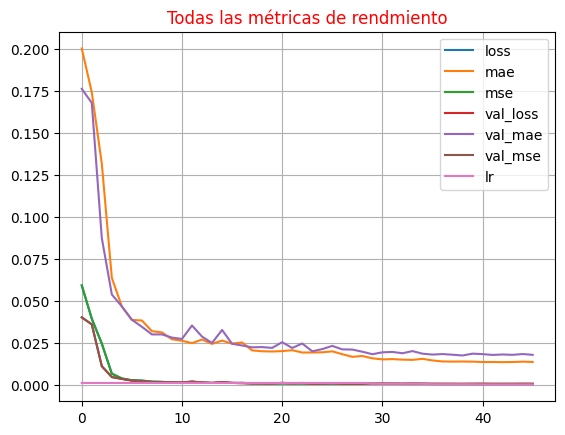

In [ ]:
# Creación y visualización de un gráfico de las métricas de rendimiento durante el entrenamiento

# Creación de un DataFrame con el historial de las métricas del modelo
hpd = pd.DataFrame(history.history)

# Creación de un gráfico para visualizar las métricas de rendimiento
hpd.plot()

# Asignación de título al gráfico
plt.title('Todas las métricas de rendimiento', c='r')

# Habilitación de las líneas de la grilla en el gráfico
plt.grid(True)

# Mostrar el gráfico
plt.show()

### ANN

In [ ]:
# Creación y entrenamiento de un modelo de Red Neuronal Artificial (ANN)

# Definición de la arquitectura de la Red Neuronal Artificial (ANN)
model_ANN = keras.models.Sequential([
    keras.layers.Dense(100, input_shape=(step_back, Ts1.shape[1],)),
    keras.layers.Dense(100),
    keras.layers.Dense(100),
    keras.layers.Dense(1)
])

# Mostrar un resumen de la arquitectura del modelo
model_ANN.summary()

# Compilación del modelo
model_ANN.compile(loss="mse", optimizer="adam", metrics=['mae', 'mse'])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 36, 100)           2500      
                                                                 
 dense_5 (Dense)             (None, 36, 100)           10100     
                                                                 
 dense_6 (Dense)             (None, 36, 100)           10100     
                                                                 
 dense_7 (Dense)             (None, 36, 1)             101       
                                                                 
Total params: 22,801
Trainable params: 22,801
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
25/25 [==============================] - 2s 21ms/step - loss: 0.0694 - mae: 0.2160 - mse: 0.0694 - val_loss: 0.0404 - val_mae: 0.1755 - val_mse: 0.0404 - lr: 0.0010
Epoch

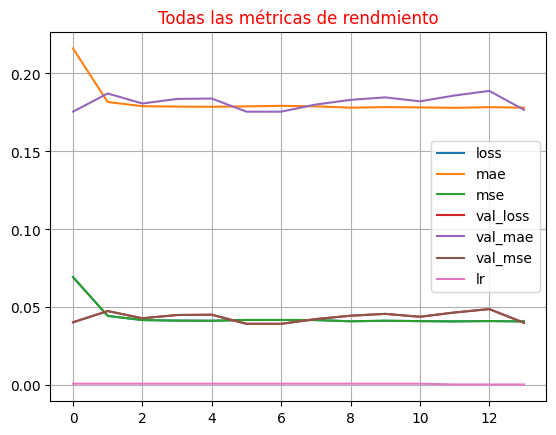

In [ ]:
# Visualización del historial de métricas de rendimiento durante el entrenamiento

# Crear un DataFrame con el historial de métricas del entrenamiento
hpd = pd.DataFrame(history.history)

# Crear una gráfica de líneas para las métricas de rendimiento
hpd.plot()

# Establecer el título del gráfico
plt.title('Todas las métricas de rendimiento', color='r')

# Habilitar las líneas de la cuadrícula en el gráfico
plt.grid(True)

# Mostrar el gráfico
plt.show()

### GRU

In [ ]:
# Definición del modelo GRU y entrenamiento

# Crear un modelo secuencial de Keras con capas GRU
model_GRU = keras.models.Sequential([
    keras.layers.GRU(100, return_sequences=True, input_shape=[step_back, Ts1.shape[1]]),
    keras.layers.GRU(100, return_sequences=True),
    keras.layers.GRU(100, return_sequences=True),
    keras.layers.GRU(1)
])

# Mostrar un resumen del modelo
model_GRU.summary()

# Compilar el modelo con función de pérdida "mse" y optimizador "adam", además de métricas de rendimiento
metrics = ['mae', 'mse']
model_GRU.compile(loss="mse", optimizer="adam", metrics=metrics)

# Entrenar el modelo utilizando los datos de entrenamiento
history = model_GRU.fit(X_train1, Y_train1, epochs=N, batch_size=bsz, callbacks=callbacks, validation_split=0.2)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, 36, 100)           37800     
                                                                 
 gru_5 (GRU)                 (None, 36, 100)           60600     
                                                                 
 gru_6 (GRU)                 (None, 36, 100)           60600     
                                                                 
 gru_7 (GRU)                 (None, 1)                 309       
                                                                 
Total params: 159,309
Trainable params: 159,309
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
25/25 [==============================] - 7s 68ms/step - loss: 0.0743 - mae: 0.2003 - mse: 0.0743 - val_loss: 0.0152 - val_mae: 0.1099 - val_mse: 0.0152 - lr: 0.0010
Epo

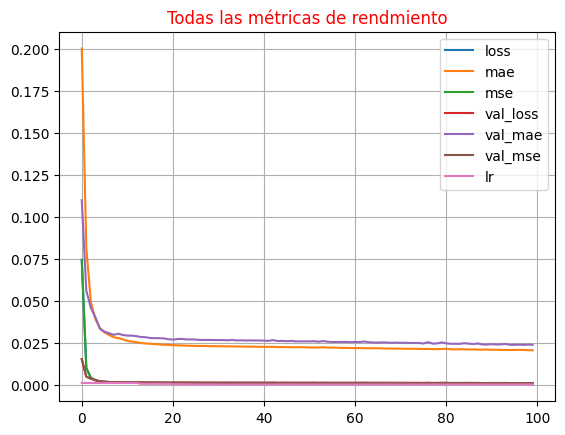

In [ ]:
# Creación del DataFrame de historial de entrenamiento y visualización de métricas

# Crear un DataFrame con el historial de entrenamiento
hpd = pd.DataFrame(history.history)

# Generar un gráfico con las métricas de rendimiento a lo largo de las épocas de entrenamiento
hpd.plot()

# Agregar un título al gráfico
plt.title('Todas las métricas de rendimiento', c='r')

# Habilitar la cuadrícula en el gráfico
plt.grid(True)

# Mostrar el gráfico
plt.show()

### RNN

In [ ]:
# Definición del modelo RNN

# Crear un modelo secuencial
model_RNN = keras.models.Sequential([
    keras.layers.SimpleRNN(100, return_sequences=True, input_shape=[step_back, Ts1.shape[1]]),
    keras.layers.SimpleRNN(100, return_sequences=True),
    keras.layers.SimpleRNN(100, return_sequences=True),
    keras.layers.SimpleRNN(1)
])

# Mostrar un resumen del modelo
model_RNN.summary()

# Compilación y entrenamiento del modelo

# Definir las métricas de rendimiento a utilizar
metrics = ['mae', 'mse']

# Compilar el modelo con la función de pérdida y el optimizador
model_RNN.compile(loss="mse", optimizer="adam", metrics=metrics)

# Entrenar el modelo utilizando los datos de entrenamiento y validación
history = model_RNN.fit(X_train1, Y_train1, epochs=N, batch_size=bsz, callbacks=callbacks, validation_split=0.2)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_20 (SimpleRNN)   (None, 36, 100)           12500     
                                                                 
 simple_rnn_21 (SimpleRNN)   (None, 36, 100)           20100     
                                                                 
 simple_rnn_22 (SimpleRNN)   (None, 36, 100)           20100     
                                                                 
 simple_rnn_23 (SimpleRNN)   (None, 1)                 102       
                                                                 
Total params: 52,802
Trainable params: 52,802
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
25/25 [==============================] - 7s 140ms/step - loss: 0.0406 - mae: 0.1472 - mse: 0.0406 - val_loss: 0.0067 - val_mae: 0.0629 - val_mse: 0.0067 - lr: 0.0010
Epo

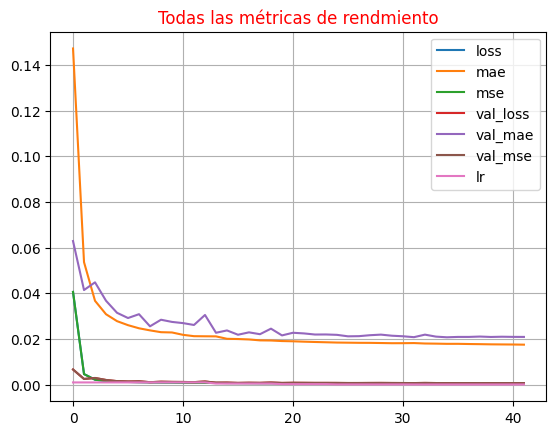

In [ ]:
# Crear un DataFrame con el historial de entrenamiento
hpd = pd.DataFrame(history.history)

# Crear una gráfica de las métricas de rendimiento a lo largo de las épocas
hpd.plot()

# Configurar el título y el color del título
plt.title('Todas las métricas de rendimiento', c='r')

# Habilitar la cuadrícula en la gráfica
plt.grid(True)

# Mostrar la gráfica
plt.show()

# Rendimiento

124/124 [==============================] - 0s 2ms/step


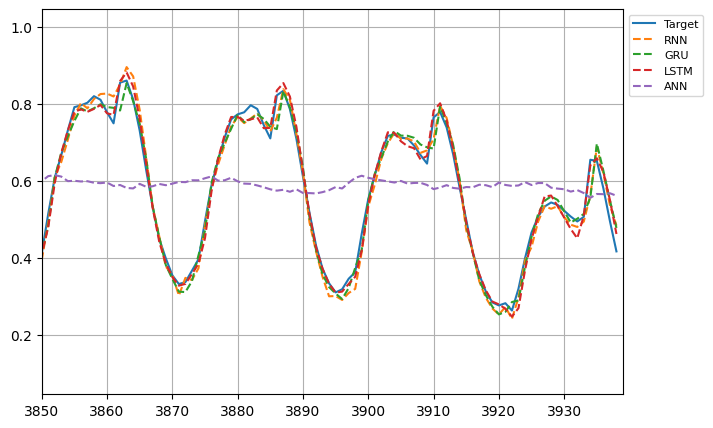

╒═════════════╤═════════════╤═════════════╤═════════════╤══════════════╕
│ Metrics     │         RNN │         GRU │        LSTM │          ANN │
╞═════════════╪═════════════╪═════════════╪═════════════╪══════════════╡
│ MSE         │ 0.02964     │ 0.0337      │ 0.02595     │  0.2062      │
├─────────────┼─────────────┼─────────────┼─────────────┼──────────────┤
│ RMSE        │ 0.000878427 │ 0.00113544  │ 0.000673466 │  0.0425187   │
├─────────────┼─────────────┼─────────────┼─────────────┼──────────────┤
│ MAE         │ 0.02327     │ 0.0257      │ 0.01956     │  0.18146     │
├─────────────┼─────────────┼─────────────┼─────────────┼──────────────┤
│ R2          │ 0.97823     │ 0.97187     │ 0.98331     │ -0.05356     │
├─────────────┼─────────────┼─────────────┼─────────────┼──────────────┤
│ cnSMAPE     │ 0.96031     │ 0.95786     │ 0.96674     │  0.67137     │
├─────────────┼─────────────┼─────────────┼─────────────┼──────────────┤
│ P_Value_PS  │ 0           │ 0           │ 0      

In [ ]:
# Realizar pronósticos utilizando los modelos entrenados
forecasting_RNN  = model_RNN.predict(X_test1)
forecasting_GRU  = model_GRU.predict(X_test1)
forecasting_LSTM = model_LSTM.predict(X_test1)
forecasting_ANN = model_ANN.predict(X_test1)

# Crear una lista de pronósticos y nombres de modelos
forecasting_DL2 = [forecasting_RNN, forecasting_GRU, forecasting_LSTM, forecasting_ANN.reshape(forecasting_ANN.shape[0], 1)]
model_names_DL = ['RNN', 'GRU', 'LSTM', 'ANN']

# Crear una figura para mostrar los resultados
plt.figure(figsize=(7.5, 5))

# Plotear los valores reales y los pronósticos de los modelos
plt.plot(Y_test1, label='Target')
for i in range(len(forecasting_DL2)):
    plt.plot(forecasting_DL2[i], label=model_names_DL[i], linestyle='--')

# Limitar el rango del eje x
plt.xlim(3850, len(forecasting_DL2[i]))

# Agregar una leyenda fuera de la gráfica
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize='8')

# Habilitar la cuadrícula en la gráfica
plt.grid()

# Mostrar la gráfica
plt.show()

# Definir nombres de columnas para la tabla de métricas
col_names = ['Metrics', 'RNN', 'GRU', 'LSTM', 'ANN']
MSE, RMSE, MAE, R2, cnSMAPE, P_Value_PS, P_Value_TT, P_Value_Var = ['MSE'], ['RMSE'], ['MAE'], ['R2'], ['cnSMAPE'], ['P_Value_PS'], ['P_Value_TT'], ['P_Value_Var']

# Calcular y almacenar métricas para cada modelo
for k in range(4):
    MSE.append(round(mean_squared_error(Y_test1, forecasting_DL2[k], squared=False), 5))
    RMSE.append(mean_squared_error(Y_test1, forecasting_DL2[k], squared=True))
    MAE.append(round(mean_absolute_error(Y_test1, forecasting_DL2[k]), 5))
    R2.append(round(r2_score(Y_test1, forecasting_DL2[k]), 5))

    # Calcular cnSMAPE
    mape = mean_absolute_percentage_error(Y_test1, forecasting_DL2[k])
    smape = 2 * mape * 100 / (100 - mape)
    cnSMAPE.append(round(1 - (smape / 2), 5))

    # Calcular p-value para la correlación de Pearson
    correlation, p_value = stats.pearsonr(Y_test1.reshape(len(Y_test1)), forecasting_DL2[k].reshape(len(Y_test1)))
    P_Value_PS.append(p_value)

    # Calcular p-value para la prueba t-student
    correlation, p_value = stats.ttest_ind(Y_test1.reshape(len(Y_test1)), forecasting_DL2[k].reshape(len(Y_test1)))
    P_Value_TT.append(p_value)

    # Calcular p-value para la prueba de homogeneidad de varianza
    statistic, p_value3 = bartlett(Y_test1.reshape(len(Y_test1)), forecasting_DL2[k].reshape(len(Y_test1)))
    P_Value_Var.append(p_value3)

# Crear una lista con todas las tablas de métricas
tablas = [MSE, RMSE, MAE, R2, cnSMAPE, P_Value_PS, P_Value_TT, P_Value_Var]

# Imprimir las tablas usando el formato fancy_grid
print(tabulate(tablas, headers=col_names, tablefmt="fancy_grid"))

124/124 [==============================] - 1s 4ms/step


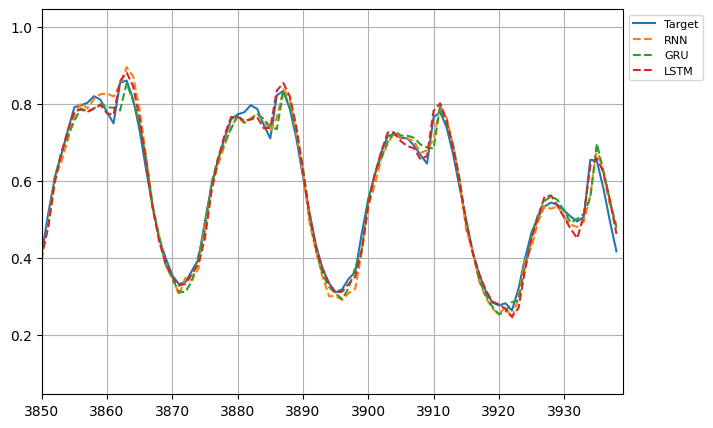

╒═════════════╤═════════════╤═════════════╤═════════════╕
│ Metrics     │         RNN │         GRU │        LSTM │
╞═════════════╪═════════════╪═════════════╪═════════════╡
│ MSE         │ 0.02964     │ 0.0337      │ 0.02595     │
├─────────────┼─────────────┼─────────────┼─────────────┤
│ RMSE        │ 0.000878427 │ 0.00113544  │ 0.000673466 │
├─────────────┼─────────────┼─────────────┼─────────────┤
│ MAE         │ 0.02327     │ 0.0257      │ 0.01956     │
├─────────────┼─────────────┼─────────────┼─────────────┤
│ R2          │ 0.97823     │ 0.97187     │ 0.98331     │
├─────────────┼─────────────┼─────────────┼─────────────┤
│ cnSMAPE     │ 0.96031     │ 0.95786     │ 0.96674     │
├─────────────┼─────────────┼─────────────┼─────────────┤
│ P_Value_PS  │ 0           │ 0           │ 0           │
├─────────────┼─────────────┼─────────────┼─────────────┤
│ P_Value_TT  │ 0.527484    │ 0.0860225   │ 0.928255    │
├─────────────┼─────────────┼─────────────┼─────────────┤
│ P_Value_Var 

In [ ]:
# Realizar pronósticos utilizando los modelos entrenados (RNN, GRU, LSTM)
forecasting_RNN  = model_RNN.predict(X_test1)
forecasting_GRU  = model_GRU.predict(X_test1)
forecasting_LSTM = model_LSTM.predict(X_test1)

# Crear una lista de pronósticos y nombres de modelos para DL2
forecasting_DL2 = [forecasting_RNN, forecasting_GRU, forecasting_LSTM]
model_names_DL = ['RNN', 'GRU', 'LSTM']

# Crear una figura para mostrar los resultados
plt.figure(figsize=(7.5, 5))

# Plotear los valores reales y los pronósticos de los modelos DL2
plt.plot(Y_test1, label='Target')
for i in range(len(forecasting_DL2)):
    plt.plot(forecasting_DL2[i], label=model_names_DL[i], linestyle='--')

# Limitar el rango del eje x
plt.xlim(3850, len(forecasting_DL2[i]))

# Agregar una leyenda fuera de la gráfica
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize='8')

# Habilitar la cuadrícula en la gráfica
plt.grid()

# Mostrar la gráfica
plt.show()

# Definir nombres de columnas para la tabla de métricas
col_names = ['Metrics', 'RNN', 'GRU', 'LSTM']
MSE, RMSE, MAE, R2, cnSMAPE, P_Value_PS, P_Value_TT, P_Value_Var = ['MSE'], ['RMSE'], ['MAE'], ['R2'], ['cnSMAPE'], ['P_Value_PS'], ['P_Value_TT'], ['P_Value_Var']

# Calcular y almacenar métricas para cada modelo DL2
for k in range(3):
    MSE.append(round(mean_squared_error(Y_test1, forecasting_DL2[k], squared=False), 5))
    RMSE.append(mean_squared_error(Y_test1, forecasting_DL2[k], squared=True))
    MAE.append(round(mean_absolute_error(Y_test1, forecasting_DL2[k]), 5))
    R2.append(round(r2_score(Y_test1, forecasting_DL2[k]), 5))

    # Calcular cnSMAPE
    mape = mean_absolute_percentage_error(Y_test1, forecasting_DL2[k])
    smape = 2 * mape * 100 / (100 - mape)
    cnSMAPE.append(round(1 - (smape / 2), 5))

    # Calcular p-value para la correlación de Pearson
    correlation, p_value = stats.pearsonr(Y_test1.reshape(len(Y_test1)), forecasting_DL2[k].reshape(len(Y_test1)))
    P_Value_PS.append(p_value)

    # Calcular p-value para la prueba t-student
    correlation, p_value = stats.ttest_ind(Y_test1.reshape(len(Y_test1)), forecasting_DL2[k].reshape(len(Y_test1)))
    P_Value_TT.append(p_value)

    # Calcular p-value para la prueba de homogeneidad de varianza
    statistic, p_value3 = bartlett(Y_test1.reshape(len(Y_test1)), forecasting_DL2[k].reshape(len(Y_test1)))
    P_Value_Var.append(p_value3)

# Crear una lista con todas las tablas de métricas DL2
tablas = [MSE, RMSE, MAE, R2, cnSMAPE, P_Value_PS, P_Value_TT, P_Value_Var]

# Imprimir las tablas usando el formato fancy_grid
print(tabulate(tablas, headers=col_names, tablefmt="fancy_grid"))

In [ ]:
# Convertir la lista de tablas en un DataFrame
tablas = pd.DataFrame(tablas)

# Guardar el DataFrame en un archivo Excel
tablas.to_excel("/content/DL_M_12.xlsx")

# Descargar el archivo Excel
files.download("/content/DL_M_12.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# TimeStep =42

### Conjunto de Entrenamiento


In [ ]:
# Partición de datos en conjuntos de entrenamiento y prueba.

# Definición de la ventana de tiempo (time step) o step_back.
step_back = 42

# Creación de conjuntos X1 e Y1 utilizando la función TrainingSets con los datos Ts1 y out, y el valor de step_back.
X1, Y1 = TrainingSets(data=Ts1, dataξ=out, step_back=step_back)

# Definición de la proporción para la partición entre conjuntos de entrenamiento y prueba.
Part = 0.8  # 80% de datos de entrenamiento, 20% de datos de prueba

# Particionamiento de los datos en conjuntos de entrenamiento y prueba para las series de tiempo.
# Para la serie X1 (datos de entrada):
X_test1 = X1[int(len(X1) * Part):]  # Conjunto de prueba (datos de entrada)
X_train1 = X1[:int(len(X1) * Part)]  # Conjunto de entrenamiento (datos de entrada)

# Para la serie Y1 (datos de salida o target):
Y_test1 = Y1[int(len(Y1) * Part):]  # Conjunto de prueba (datos de salida)
Y_train1 = Y1[:int(len(Y1) * Part)]  # Conjunto de entrenamiento (datos de salida)

### LSTM

In [ ]:
# Creación y entrenamiento del modelo LSTM.

# Crear un modelo secuencial de Keras para el modelo LSTM.
model_LSTM = keras.models.Sequential([
    keras.layers.LSTM(100, return_sequences=True, input_shape=[step_back, Ts1.shape[1]]),  # Capa LSTM con 100 unidades y retorno de secuencias
    keras.layers.LSTM(100, return_sequences=True),  # Capa LSTM con 100 unidades y retorno de secuencias
    keras.layers.LSTM(100, return_sequences=True),  # Capa LSTM con 100 unidades y retorno de secuencias
    keras.layers.LSTM(1)  # Capa LSTM con 1 unidad de salida
])
model_LSTM.summary()  # Mostrar resumen del modelo

# Configuración de entrenamiento del modelo LSTM.

# Compilar el modelo utilizando la función de pérdida 'mse' (Mean Squared Error) y el optimizador 'adam'.
# Se seleccionan las métricas de rendimiento a evaluar durante el entrenamiento: 'mae' (Mean Absolute Error) y 'mse' (Mean Squared Error).
model_LSTM.compile(loss="mse", optimizer="adam", metrics=['mae', 'mse'])

# Entrenar el modelo LSTM utilizando los conjuntos de entrenamiento X_train1 e Y_train1.
# Se especifica el número de épocas (N), el tamaño del lote (batch_size), los callbacks definidos previamente, y la proporción de validación (validation_split).
history = model_LSTM.fit(X_train1, Y_train1, epochs=N, batch_size=bsz, callbacks=callbacks, validation_split=0.2)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 42, 100)           50000     
                                                                 
 lstm_9 (LSTM)               (None, 42, 100)           80400     
                                                                 
 lstm_10 (LSTM)              (None, 42, 100)           80400     
                                                                 
 lstm_11 (LSTM)              (None, 1)                 408       
                                                                 
Total params: 211,208
Trainable params: 211,208
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
25/25 [==============================] - 8s 78ms/step - loss: 0.0579 - mae: 0.1998 - mse: 0.0579 - val_loss: 0.0377 - val_mae: 0.1726 - val_mse: 0.0377 - lr: 0.0010
Ep

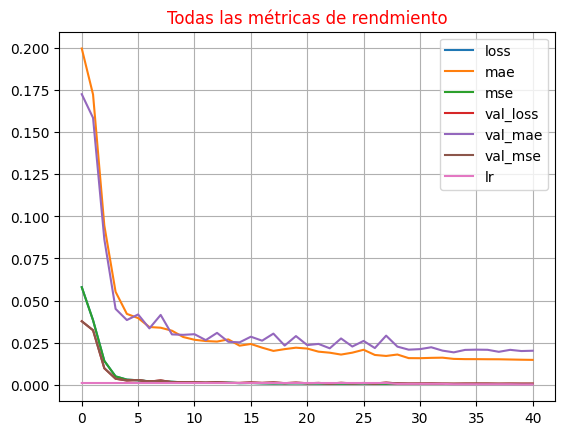

In [ ]:
# Creación y visualización de un gráfico de las métricas de rendimiento durante el entrenamiento

# Creación de un DataFrame con el historial de las métricas del modelo
hpd = pd.DataFrame(history.history)

# Creación de un gráfico para visualizar las métricas de rendimiento
hpd.plot()

# Asignación de título al gráfico
plt.title('Todas las métricas de rendimiento', c='r')

# Habilitación de las líneas de la grilla en el gráfico
plt.grid(True)

# Mostrar el gráfico
plt.show()

### ANN

In [ ]:
# Creación y entrenamiento de un modelo de Red Neuronal Artificial (ANN)

# Definición de la arquitectura de la Red Neuronal Artificial (ANN)
model_ANN = keras.models.Sequential([
    keras.layers.Dense(100, input_shape=(step_back, Ts1.shape[1],)),
    keras.layers.Dense(100),
    keras.layers.Dense(100),
    keras.layers.Dense(1)
])

# Mostrar un resumen de la arquitectura del modelo
model_ANN.summary()

# Compilación del modelo
model_ANN.compile(loss="mse", optimizer="adam", metrics=['mae', 'mse'])

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 42, 100)           2500      
                                                                 
 dense_9 (Dense)             (None, 42, 100)           10100     
                                                                 
 dense_10 (Dense)            (None, 42, 100)           10100     
                                                                 
 dense_11 (Dense)            (None, 42, 1)             101       
                                                                 
Total params: 22,801
Trainable params: 22,801
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
25/25 [==============================] - 2s 21ms/step - loss: 0.1296 - mae: 0.2822 - mse: 0.1296 - val_loss: 0.0614 - val_mae: 0.2065 - val_mse: 0.0614 - lr: 0.0010
Epoc

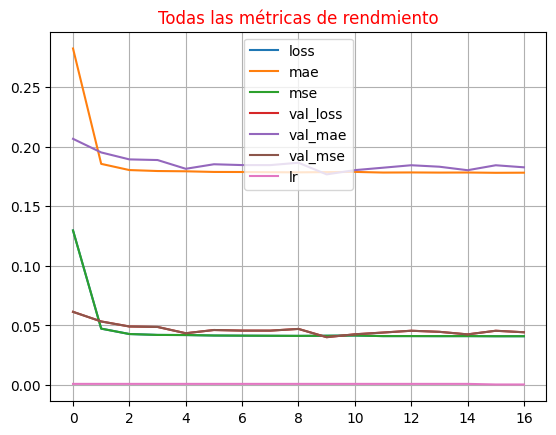

In [ ]:
# Visualización del historial de métricas de rendimiento durante el entrenamiento

# Crear un DataFrame con el historial de métricas del entrenamiento
hpd = pd.DataFrame(history.history)

# Crear una gráfica de líneas para las métricas de rendimiento
hpd.plot()

# Establecer el título del gráfico
plt.title('Todas las métricas de rendimiento', color='r')

# Habilitar las líneas de la cuadrícula en el gráfico
plt.grid(True)

# Mostrar el gráfico
plt.show()

### GRU

In [ ]:
# Definición del modelo GRU y entrenamiento

# Crear un modelo secuencial de Keras con capas GRU
model_GRU = keras.models.Sequential([
    keras.layers.GRU(100, return_sequences=True, input_shape=[step_back, Ts1.shape[1]]),
    keras.layers.GRU(100, return_sequences=True),
    keras.layers.GRU(100, return_sequences=True),
    keras.layers.GRU(1)
])

# Mostrar un resumen del modelo
model_GRU.summary()

# Compilar el modelo con función de pérdida "mse" y optimizador "adam", además de métricas de rendimiento
metrics = ['mae', 'mse']
model_GRU.compile(loss="mse", optimizer="adam", metrics=metrics)

# Entrenar el modelo utilizando los datos de entrenamiento
history = model_GRU.fit(X_train1, Y_train1, epochs=N, batch_size=bsz, callbacks=callbacks, validation_split=0.2)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_8 (GRU)                 (None, 42, 100)           37800     
                                                                 
 gru_9 (GRU)                 (None, 42, 100)           60600     
                                                                 
 gru_10 (GRU)                (None, 42, 100)           60600     
                                                                 
 gru_11 (GRU)                (None, 1)                 309       
                                                                 
Total params: 159,309
Trainable params: 159,309
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
25/25 [==============================] - 8s 121ms/step - loss: 0.0718 - mae: 0.2022 - mse: 0.0718 - val_loss: 0.0193 - val_mae: 0.1248 - val_mse: 0.0193 - lr: 0.0010
E

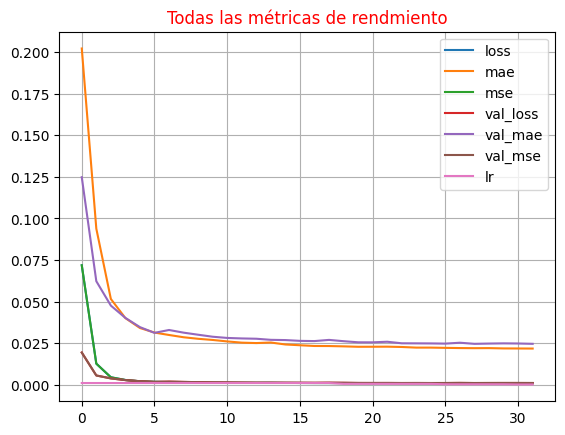

In [ ]:
# Creación del DataFrame de historial de entrenamiento y visualización de métricas

# Crear un DataFrame con el historial de entrenamiento
hpd = pd.DataFrame(history.history)

# Generar un gráfico con las métricas de rendimiento a lo largo de las épocas de entrenamiento
hpd.plot()

# Agregar un título al gráfico
plt.title('Todas las métricas de rendimiento', c='r')

# Habilitar la cuadrícula en el gráfico
plt.grid(True)

# Mostrar el gráfico
plt.show()

### RNN

In [ ]:
# Definición del modelo RNN

# Crear un modelo secuencial
model_RNN = keras.models.Sequential([
    keras.layers.SimpleRNN(100, return_sequences=True, input_shape=[step_back, Ts1.shape[1]]),
    keras.layers.SimpleRNN(100, return_sequences=True),
    keras.layers.SimpleRNN(100, return_sequences=True),
    keras.layers.SimpleRNN(1)
])

# Mostrar un resumen del modelo
model_RNN.summary()

# Compilación y entrenamiento del modelo

# Definir las métricas de rendimiento a utilizar
metrics = ['mae', 'mse']

# Compilar el modelo con la función de pérdida y el optimizador
model_RNN.compile(loss="mse", optimizer="adam", metrics=metrics)

# Entrenar el modelo utilizando los datos de entrenamiento y validación
history = model_RNN.fit(X_train1, Y_train1, epochs=N, batch_size=bsz, callbacks=callbacks, validation_split=0.2)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_24 (SimpleRNN)   (None, 42, 100)           12500     
                                                                 
 simple_rnn_25 (SimpleRNN)   (None, 42, 100)           20100     
                                                                 
 simple_rnn_26 (SimpleRNN)   (None, 42, 100)           20100     
                                                                 
 simple_rnn_27 (SimpleRNN)   (None, 1)                 102       
                                                                 
Total params: 52,802
Trainable params: 52,802
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
25/25 [==============================] - 7s 152ms/step - loss: 0.0228 - mae: 0.1052 - mse: 0.0228 - val_loss: 0.0069 - val_mae: 0.0683 - val_mse: 0.0069 - lr: 0.0010
Epo

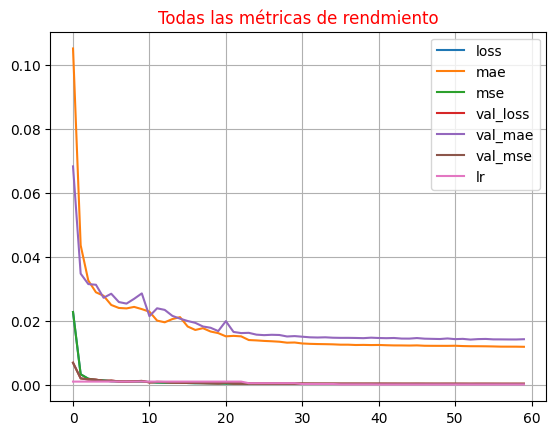

In [ ]:
# Crear un DataFrame con el historial de entrenamiento
hpd = pd.DataFrame(history.history)

# Crear una gráfica de las métricas de rendimiento a lo largo de las épocas
hpd.plot()

# Configurar el título y el color del título
plt.title('Todas las métricas de rendimiento', c='r')

# Habilitar la cuadrícula en la gráfica
plt.grid(True)

# Mostrar la gráfica
plt.show()

# Rendimiento

124/124 [==============================] - 0s 2ms/step


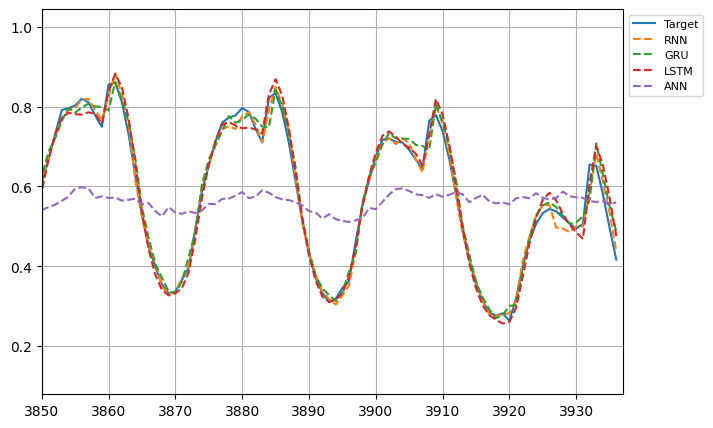

╒═════════════╤═════════════╤════════════╤════════════╤═══════════════╕
│ Metrics     │         RNN │        GRU │       LSTM │           ANN │
╞═════════════╪═════════════╪════════════╪════════════╪═══════════════╡
│ MSE         │ 0.02028     │ 0.03364    │ 0.02837    │  0.20275      │
├─────────────┼─────────────┼────────────┼────────────┼───────────────┤
│ RMSE        │ 0.000411197 │ 0.00113183 │ 0.00080484 │  0.0411057    │
├─────────────┼─────────────┼────────────┼────────────┼───────────────┤
│ MAE         │ 0.0157      │ 0.02635    │ 0.02162    │  0.1766       │
├─────────────┼─────────────┼────────────┼────────────┼───────────────┤
│ R2          │ 0.98981     │ 0.97196    │ 0.98006    │ -0.01831      │
├─────────────┼─────────────┼────────────┼────────────┼───────────────┤
│ cnSMAPE     │ 0.97239     │ 0.95541    │ 0.96302    │  0.69366      │
├─────────────┼─────────────┼────────────┼────────────┼───────────────┤
│ P_Value_PS  │ 0           │ 0          │ 0          │  3.66754

In [ ]:
# Realizar pronósticos utilizando los modelos entrenados
forecasting_RNN  = model_RNN.predict(X_test1)
forecasting_GRU  = model_GRU.predict(X_test1)
forecasting_LSTM = model_LSTM.predict(X_test1)
forecasting_ANN = model_ANN.predict(X_test1)

# Crear una lista de pronósticos y nombres de modelos
forecasting_DL2 = [forecasting_RNN, forecasting_GRU, forecasting_LSTM, forecasting_ANN.reshape(forecasting_ANN.shape[0], 1)]
model_names_DL = ['RNN', 'GRU', 'LSTM', 'ANN']

# Crear una figura para mostrar los resultados
plt.figure(figsize=(7.5, 5))

# Plotear los valores reales y los pronósticos de los modelos
plt.plot(Y_test1, label='Target')
for i in range(len(forecasting_DL2)):
    plt.plot(forecasting_DL2[i], label=model_names_DL[i], linestyle='--')

# Limitar el rango del eje x
plt.xlim(3850, len(forecasting_DL2[i]))

# Agregar una leyenda fuera de la gráfica
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize='8')

# Habilitar la cuadrícula en la gráfica
plt.grid()

# Mostrar la gráfica
plt.show()

# Definir nombres de columnas para la tabla de métricas
col_names = ['Metrics', 'RNN', 'GRU', 'LSTM', 'ANN']
MSE, RMSE, MAE, R2, cnSMAPE, P_Value_PS, P_Value_TT, P_Value_Var = ['MSE'], ['RMSE'], ['MAE'], ['R2'], ['cnSMAPE'], ['P_Value_PS'], ['P_Value_TT'], ['P_Value_Var']

# Calcular y almacenar métricas para cada modelo
for k in range(4):
    MSE.append(round(mean_squared_error(Y_test1, forecasting_DL2[k], squared=False), 5))
    RMSE.append(mean_squared_error(Y_test1, forecasting_DL2[k], squared=True))
    MAE.append(round(mean_absolute_error(Y_test1, forecasting_DL2[k]), 5))
    R2.append(round(r2_score(Y_test1, forecasting_DL2[k]), 5))

    # Calcular cnSMAPE
    mape = mean_absolute_percentage_error(Y_test1, forecasting_DL2[k])
    smape = 2 * mape * 100 / (100 - mape)
    cnSMAPE.append(round(1 - (smape / 2), 5))

    # Calcular p-value para la correlación de Pearson
    correlation, p_value = stats.pearsonr(Y_test1.reshape(len(Y_test1)), forecasting_DL2[k].reshape(len(Y_test1)))
    P_Value_PS.append(p_value)

    # Calcular p-value para la prueba t-student
    correlation, p_value = stats.ttest_ind(Y_test1.reshape(len(Y_test1)), forecasting_DL2[k].reshape(len(Y_test1)))
    P_Value_TT.append(p_value)

    # Calcular p-value para la prueba de homogeneidad de varianza
    statistic, p_value3 = bartlett(Y_test1.reshape(len(Y_test1)), forecasting_DL2[k].reshape(len(Y_test1)))
    P_Value_Var.append(p_value3)

# Crear una lista con todas las tablas de métricas
tablas = [MSE, RMSE, MAE, R2, cnSMAPE, P_Value_PS, P_Value_TT, P_Value_Var]

# Imprimir las tablas usando el formato fancy_grid
print(tabulate(tablas, headers=col_names, tablefmt="fancy_grid"))

124/124 [==============================] - 1s 4ms/step


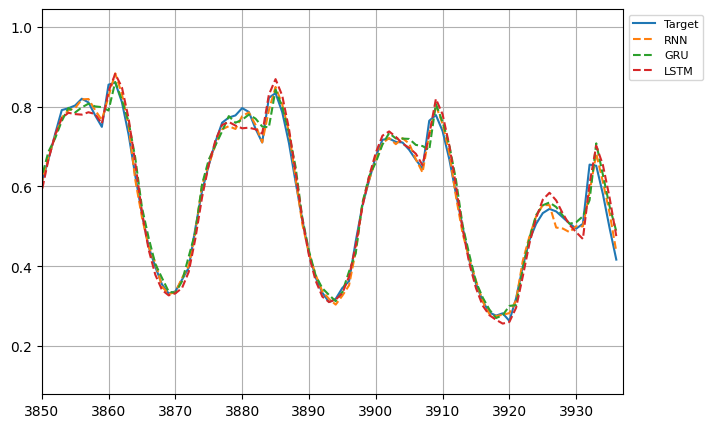

╒═════════════╤═════════════╤════════════╤════════════╕
│ Metrics     │         RNN │        GRU │       LSTM │
╞═════════════╪═════════════╪════════════╪════════════╡
│ MSE         │ 0.02028     │ 0.03364    │ 0.02837    │
├─────────────┼─────────────┼────────────┼────────────┤
│ RMSE        │ 0.000411197 │ 0.00113183 │ 0.00080484 │
├─────────────┼─────────────┼────────────┼────────────┤
│ MAE         │ 0.0157      │ 0.02635    │ 0.02162    │
├─────────────┼─────────────┼────────────┼────────────┤
│ R2          │ 0.98981     │ 0.97196    │ 0.98006    │
├─────────────┼─────────────┼────────────┼────────────┤
│ cnSMAPE     │ 0.97239     │ 0.95541    │ 0.96302    │
├─────────────┼─────────────┼────────────┼────────────┤
│ P_Value_PS  │ 0           │ 0          │ 0          │
├─────────────┼─────────────┼────────────┼────────────┤
│ P_Value_TT  │ 0.951992    │ 0.62148    │ 0.405632   │
├─────────────┼─────────────┼────────────┼────────────┤
│ P_Value_Var │ 0.567416    │ 4.0749e-06 │ 0.805

In [ ]:
# Realizar pronósticos utilizando los modelos entrenados (RNN, GRU, LSTM)
forecasting_RNN  = model_RNN.predict(X_test1)
forecasting_GRU  = model_GRU.predict(X_test1)
forecasting_LSTM = model_LSTM.predict(X_test1)

# Crear una lista de pronósticos y nombres de modelos para DL2
forecasting_DL2 = [forecasting_RNN, forecasting_GRU, forecasting_LSTM]
model_names_DL = ['RNN', 'GRU', 'LSTM']

# Crear una figura para mostrar los resultados
plt.figure(figsize=(7.5, 5))

# Plotear los valores reales y los pronósticos de los modelos DL2
plt.plot(Y_test1, label='Target')
for i in range(len(forecasting_DL2)):
    plt.plot(forecasting_DL2[i], label=model_names_DL[i], linestyle='--')

# Limitar el rango del eje x
plt.xlim(3850, len(forecasting_DL2[i]))

# Agregar una leyenda fuera de la gráfica
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize='8')

# Habilitar la cuadrícula en la gráfica
plt.grid()

# Mostrar la gráfica
plt.show()

# Definir nombres de columnas para la tabla de métricas
col_names = ['Metrics', 'RNN', 'GRU', 'LSTM']
MSE, RMSE, MAE, R2, cnSMAPE, P_Value_PS, P_Value_TT, P_Value_Var = ['MSE'], ['RMSE'], ['MAE'], ['R2'], ['cnSMAPE'], ['P_Value_PS'], ['P_Value_TT'], ['P_Value_Var']

# Calcular y almacenar métricas para cada modelo DL2
for k in range(3):
    MSE.append(round(mean_squared_error(Y_test1, forecasting_DL2[k], squared=False), 5))
    RMSE.append(mean_squared_error(Y_test1, forecasting_DL2[k], squared=True))
    MAE.append(round(mean_absolute_error(Y_test1, forecasting_DL2[k]), 5))
    R2.append(round(r2_score(Y_test1, forecasting_DL2[k]), 5))

    # Calcular cnSMAPE
    mape = mean_absolute_percentage_error(Y_test1, forecasting_DL2[k])
    smape = 2 * mape * 100 / (100 - mape)
    cnSMAPE.append(round(1 - (smape / 2), 5))

    # Calcular p-value para la correlación de Pearson
    correlation, p_value = stats.pearsonr(Y_test1.reshape(len(Y_test1)), forecasting_DL2[k].reshape(len(Y_test1)))
    P_Value_PS.append(p_value)

    # Calcular p-value para la prueba t-student
    correlation, p_value = stats.ttest_ind(Y_test1.reshape(len(Y_test1)), forecasting_DL2[k].reshape(len(Y_test1)))
    P_Value_TT.append(p_value)

    # Calcular p-value para la prueba de homogeneidad de varianza
    statistic, p_value3 = bartlett(Y_test1.reshape(len(Y_test1)), forecasting_DL2[k].reshape(len(Y_test1)))
    P_Value_Var.append(p_value3)

# Crear una lista con todas las tablas de métricas DL2
tablas = [MSE, RMSE, MAE, R2, cnSMAPE, P_Value_PS, P_Value_TT, P_Value_Var]

# Imprimir las tablas usando el formato fancy_grid
print(tabulate(tablas, headers=col_names, tablefmt="fancy_grid"))

In [ ]:
# Convertir la lista de tablas en un DataFrame
tablas = pd.DataFrame(tablas)

# Guardar el DataFrame en un archivo Excel
tablas.to_excel("/content/DL_M_18.xlsx")

# Descargar el archivo Excel
files.download("/content/DL_M_18.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# tiempo

In [ ]:
# Cálculo del tiempo transcurrido

# Registrar el tiempo de finalización
fin = time.time()

# Calcular el tiempo transcurrido
tiempo_transcurrido = fin - inicio

# Imprimir el tiempo transcurrido en segundos
print("Tiempo transcurrido: ", tiempo_transcurrido, "segundos")

Tiempo transcurrido:  751.5628473758698 segundos
